In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Seleção de Modelos
from sklearn.model_selection import train_test_split,cross_validate

#Métricas
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import roc_curve, auc

In [36]:
train = pd.read_csv(r"C:\Users\LENOVO\Downloads\train_dataset.csv")
test = pd.read_csv(r"C:\Users\LENOVO\Downloads\test_dataset.csv")

In [37]:
train.head()

,budget,producer,origin_country,director,genre,movie_theater_revenue,movie_id,duration,user_ratings,main_actor,movie_views,story_author,year_launched,trailer_audience,movie_theater_price,box_office_revenue
0,42355873.33,DF99FC47AA,C21419A540,8BCFBC2237,6A4988C2E5,41829931.2,55E9AA240E,95.0,8.1,0AAE43DC04,199437.0,6E0CDF5B84,1989,544449.0,54.97,4.006789e+08
1,41022540.00,01583D6625,C21419A540,A2CC4C1140,DBC957EC29,56109095.2,B9905F4C17,112.0,7.8,A7B1997070,176481.0,A2CC4C1140,1989,668077.0,51.72,3.987626e+08
2,47022540.00,01583D6625,C21419A540,10E30A4348,425B0372BA,143840480.8,70DF377978,120.0,6.9,6323EE000D,157927.0,550BC8DEA4,1989,1689223.0,72.10,4.131458e+08
3,49355873.33,6E0F12B3D5,C21419A540,7612026E13,425B0372BA,68128198.4,8431E8A232,152.0,8.4,B2F592F0A4,360089.0,7612026E13,1989,932436.0,74.47,4.131795e+08
4,43022540.00,E2512DCEC0,C21419A540,4F1CB766D1,6A4988C2E5,14851690.4,864678FD4C,96.0,6.9,82C9557088,24412.0,426D08B6FA,1989,233564.0,51.53,3.965687e+08


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 16 columns):
budget                   6600 non-null float64
producer                 6600 non-null object
origin_country           6600 non-null object
director                 6600 non-null object
genre                    6600 non-null object
movie_theater_revenue    6600 non-null float64
movie_id                 6600 non-null object
duration                 6600 non-null float64
user_ratings             6600 non-null float64
main_actor               6600 non-null object
movie_views              6600 non-null float64
story_author             6600 non-null object
year_launched            6600 non-null int64
trailer_audience         6600 non-null float64
movie_theater_price      6600 non-null float64
box_office_revenue       6600 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 825.1+ KB


In [39]:
test.head()

,budget,producer,origin_country,director,genre,movie_theater_revenue,movie_id,duration,user_ratings,main_actor,story_author,year_launched,trailer_audience,movie_theater_price,box_office_revenue
0,4.102254e+07,BAC2AED2D1,C21419A540,C3EA72A2FA,2BD4FCE0C1,142144.0,A61E45A12E,130.0,5.4,742D3FDF5C,C3EA72A2FA,2019,50600.0,45.94,3.929819e+08
1,1.203559e+08,9E2E48F8EE,C21419A540,191287A9FD,425B0372BA,43716578.4,AC1F0713D7,126.0,5.9,D07E1CB35F,4829EF26B7,2019,581953.0,134.83,4.025427e+08
2,5.702254e+07,D7BA74A76E,C21419A540,2C4CC7EDF2,DBC957EC29,120881442.4,A897963B91,142.0,8.2,52ECF3E15A,2C4CC7EDF2,2019,1388526.0,74.99,4.060351e+08
3,1.536892e+08,497848D53F,C21419A540,D8A83A79D5,425B0372BA,260080043.2,F022DB8B47,136.0,6.2,66081501BC,D8A83A79D5,2019,2636105.0,157.22,3.915945e+08
4,8.702254e+07,AF8A7ECF46,C21419A540,03C695580E,83CD1557CD,216263236.0,E609EDA8E4,118.0,7.1,A7529818F4,03C695580E,2019,2417074.0,112.47,4.135082e+08


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 15 columns):
budget                   220 non-null float64
producer                 220 non-null object
origin_country           220 non-null object
director                 220 non-null object
genre                    220 non-null object
movie_theater_revenue    220 non-null float64
movie_id                 220 non-null object
duration                 220 non-null float64
user_ratings             220 non-null float64
main_actor               220 non-null object
story_author             220 non-null object
year_launched            220 non-null int64
trailer_audience         220 non-null float64
movie_theater_price      220 non-null float64
box_office_revenue       220 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 25.9+ KB


In [41]:
train.isnull().sum()

budget                   0
producer                 0
origin_country           0
director                 0
genre                    0
movie_theater_revenue    0
movie_id                 0
duration                 0
user_ratings             0
main_actor               0
movie_views              0
story_author             0
year_launched            0
trailer_audience         0
movie_theater_price      0
box_office_revenue       0
dtype: int64

In [42]:
test.isnull().sum()

budget                   0
producer                 0
origin_country           0
director                 0
genre                    0
movie_theater_revenue    0
movie_id                 0
duration                 0
user_ratings             0
main_actor               0
story_author             0
year_launched            0
trailer_audience         0
movie_theater_price      0
box_office_revenue       0
dtype: int64

In [43]:
train.nunique()

budget                    347
producer                 2103
origin_country             55
director                 2695
genre                      17
movie_theater_revenue    6582
movie_id                 6515
duration                  135
user_ratings               75
main_actor               2447
movie_views              6135
story_author             4103
year_launched              30
trailer_audience         6565
movie_theater_price      4074
box_office_revenue       6600
dtype: int64

In [44]:
test.nunique()

budget                    80
producer                 165
origin_country            22
director                 214
genre                      8
movie_theater_revenue    220
movie_id                 220
duration                  61
user_ratings              40
main_actor               191
story_author             212
year_launched              1
trailer_audience         220
movie_theater_price      217
box_office_revenue       220
dtype: int64

In [45]:
new_train = train.drop_duplicates(subset = "movie_views", keep = 'first').set_index("movie_id")
new_train.shape

(6135, 15)

In [46]:
new_train = pd.get_dummies(data = new_train, prefix = ['genre'], columns = ['genre'])
new_train.nunique()

budget                    335
producer                 1940
origin_country             51
director                 2537
movie_theater_revenue    6122
duration                  135
user_ratings               74
main_actor               2293
movie_views              6135
story_author             3833
year_launched              30
trailer_audience         6107
movie_theater_price      3928
box_office_revenue       6135
genre_1E452E1E2C            2
genre_2BD4FCE0C1            2
genre_2D4EDBC856            2
genre_305898C9A4            2
genre_425B0372BA            2
genre_47CEF4B42C            2
genre_4D0ECF596C            2
genre_6A4988C2E5            2
genre_6DF2F2D74A            2
genre_7117B45ACD            2
genre_83CD1557CD            2
genre_AF30AF46D0            2
genre_BCD8A37629            2
genre_BD554FF6E8            2
genre_D092B784B0            2
genre_DBC957EC29            2
genre_E5ECF561FE            2
dtype: int64

In [47]:
new_train = new_train.select_dtypes(exclude=['object'])
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6135 entries, 55E9AA240E to D4655D3024
Data columns (total 26 columns):
budget                   6135 non-null float64
movie_theater_revenue    6135 non-null float64
duration                 6135 non-null float64
user_ratings             6135 non-null float64
movie_views              6135 non-null float64
year_launched            6135 non-null int64
trailer_audience         6135 non-null float64
movie_theater_price      6135 non-null float64
box_office_revenue       6135 non-null float64
genre_1E452E1E2C         6135 non-null uint8
genre_2BD4FCE0C1         6135 non-null uint8
genre_2D4EDBC856         6135 non-null uint8
genre_305898C9A4         6135 non-null uint8
genre_425B0372BA         6135 non-null uint8
genre_47CEF4B42C         6135 non-null uint8
genre_4D0ECF596C         6135 non-null uint8
genre_6A4988C2E5         6135 non-null uint8
genre_6DF2F2D74A         6135 non-null uint8
genre_7117B45ACD         6135 non-null uint8
genre_83CD15

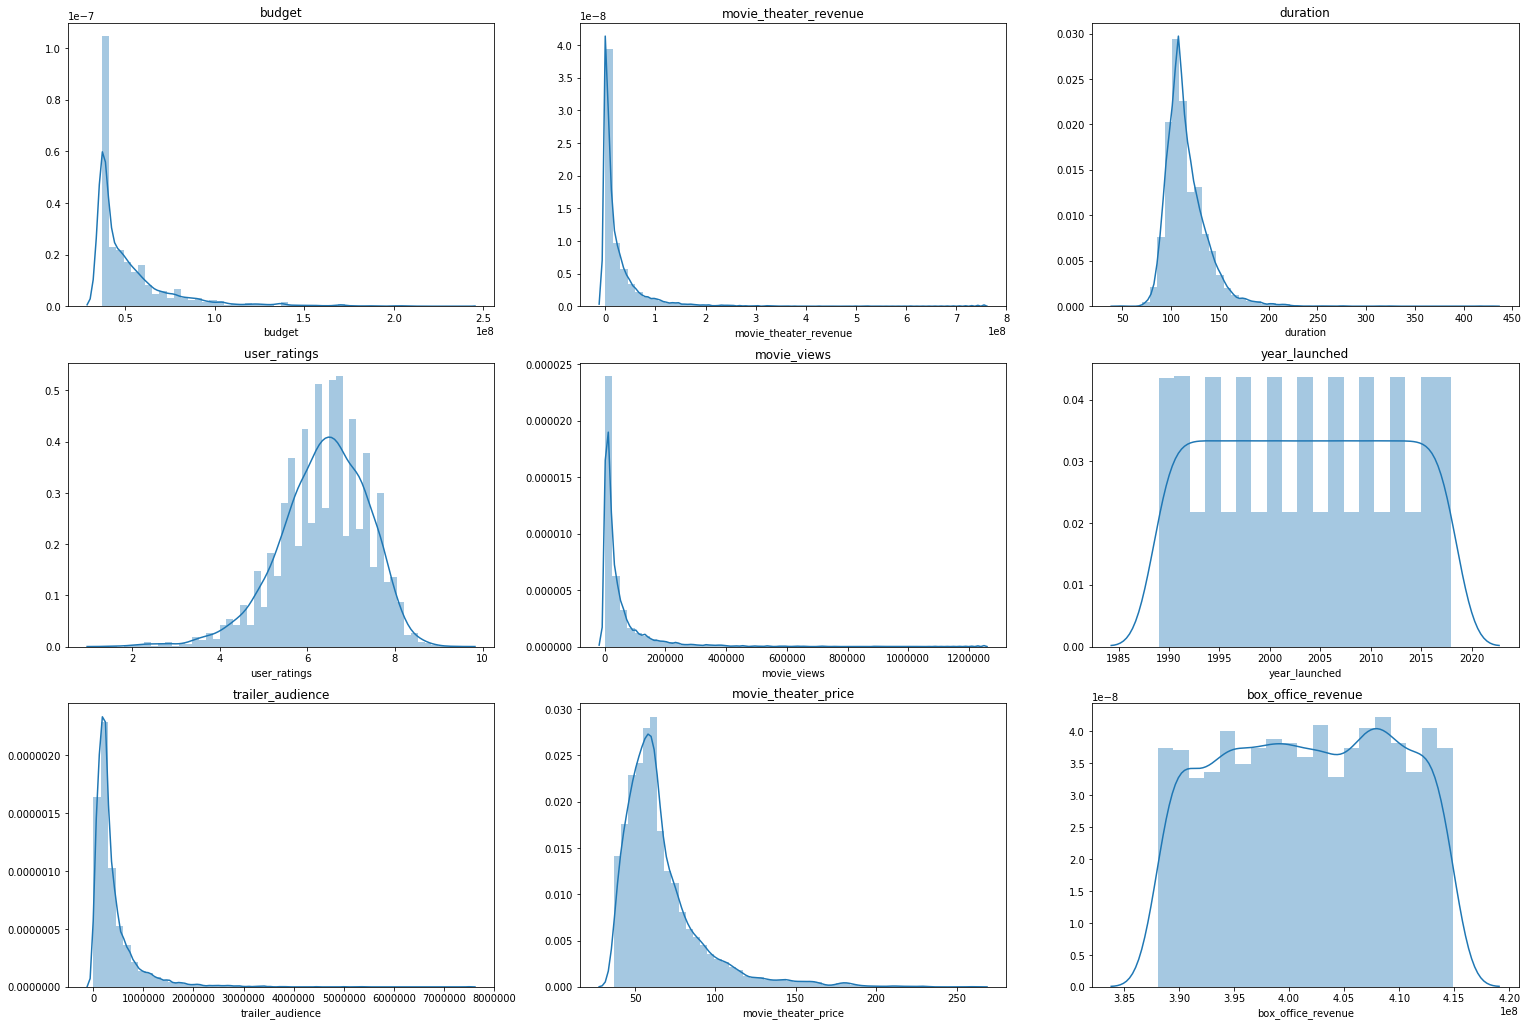

In [48]:
# Transformando a varíavel year_launched em float
new_train["year_launched"] = new_train['year_launched'].astype(float)

# Verificando a forma da distribuição
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(new_train.columns)[0:9]):
    plt.subplot(4, 3, i + 1)
    sns.distplot(train[col])
    plt.title(col)

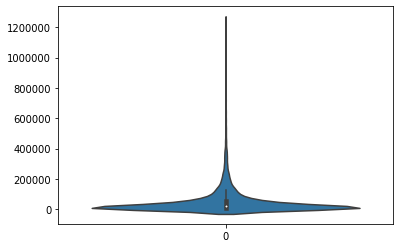

In [49]:
sns.violinplot(data = new_train["movie_views"])

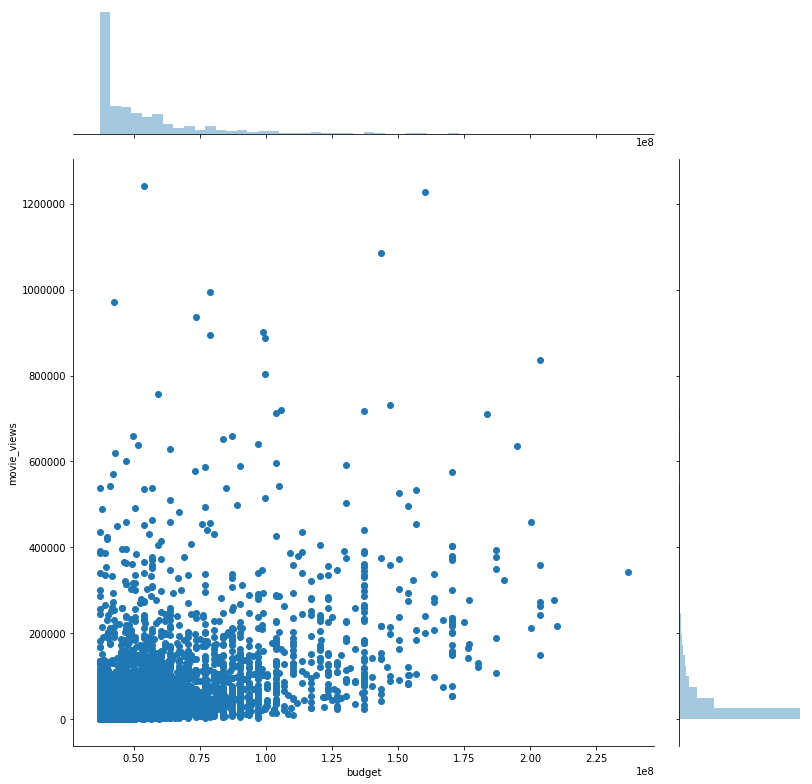

In [50]:
sns.jointplot(x='budget', y='movie_views', data=new_train, height=11, ratio=4)

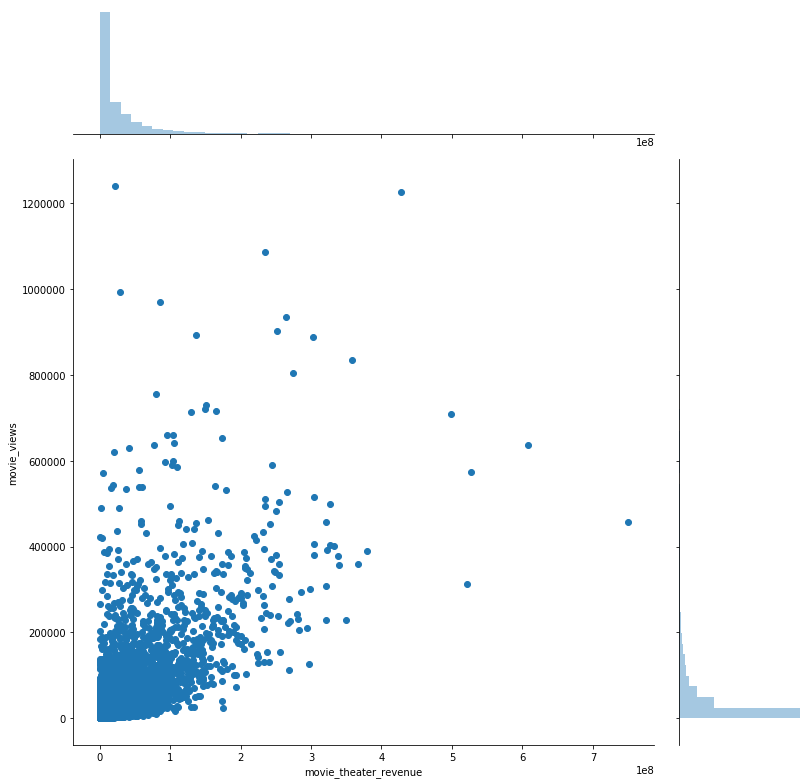

In [51]:
sns.jointplot(x='movie_theater_revenue', y='movie_views', data=new_train, height=11, ratio=4)

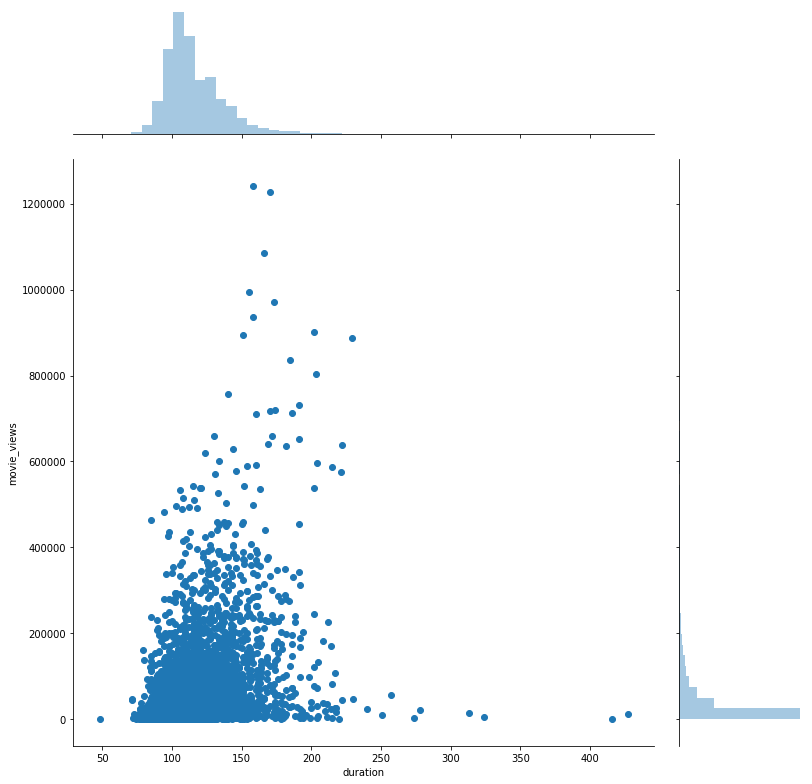

In [52]:
sns.jointplot(x='duration', y='movie_views', data=new_train, height=11, ratio=4)

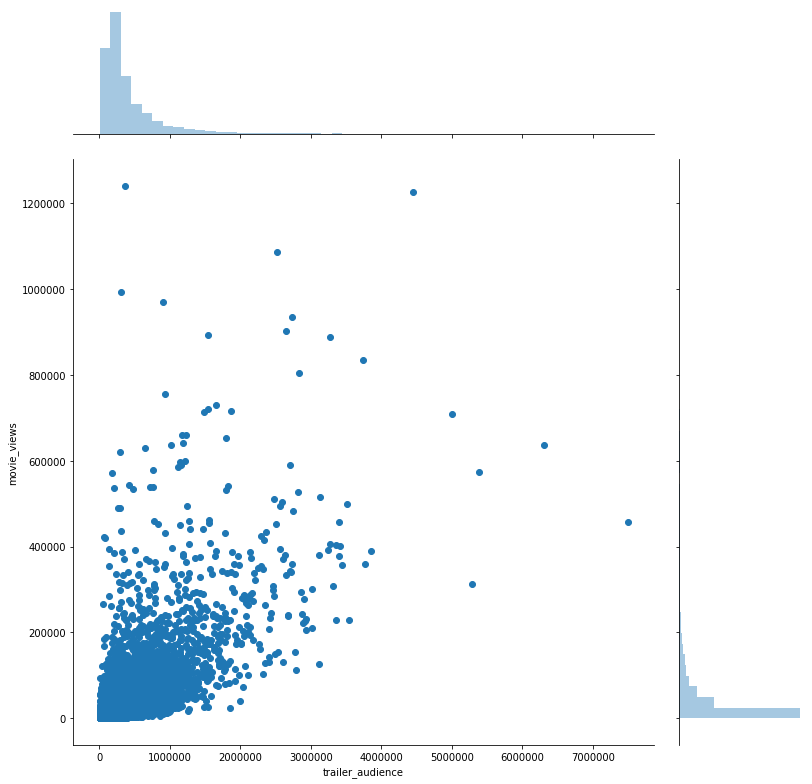

In [53]:
sns.jointplot(x='trailer_audience', y='movie_views', data=new_train, height=11, ratio=4)

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

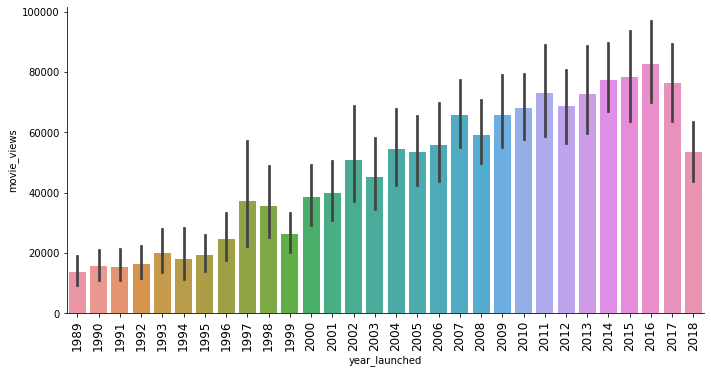

In [54]:
sns.factorplot(x='year_launched', y='movie_views', data=train, kind='bar', size=5, aspect=2)
plt.xticks(fontsize=12,rotation=90)

In [55]:
#Realizando todas as transformações feitas, mas com o dataset de test

new_test = pd.get_dummies(data = test, prefix = ['genre'], columns = ['genre'])
new_test = new_test.select_dtypes(exclude=['object'])
new_test["year_launched"] = new_test['year_launched'].astype(float)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 16 columns):
budget                   220 non-null float64
movie_theater_revenue    220 non-null float64
duration                 220 non-null float64
user_ratings             220 non-null float64
year_launched            220 non-null float64
trailer_audience         220 non-null float64
movie_theater_price      220 non-null float64
box_office_revenue       220 non-null float64
genre_1E452E1E2C         220 non-null uint8
genre_2BD4FCE0C1         220 non-null uint8
genre_425B0372BA         220 non-null uint8
genre_6A4988C2E5         220 non-null uint8
genre_83CD1557CD         220 non-null uint8
genre_BD554FF6E8         220 non-null uint8
genre_DBC957EC29         220 non-null uint8
genre_E5ECF561FE         220 non-null uint8
dtypes: float64(8), uint8(8)
memory usage: 15.6 KB


In [56]:
cols_to_normalize = []
for col in new_train.columns[0:9]:
    if (new_train[col].skew() > 0.7) | (new_train[col].skew() < -0.7):
        cols_to_normalize.append(col)

In [57]:
cols_to_normalize.remove('movie_views')
cols_to_normalize

['budget',
 'movie_theater_revenue',
 'duration',
 'trailer_audience',
 'movie_theater_price']

In [59]:
new_train[cols_to_normalize] = normalize(new_train[cols_to_normalize])
new_test[cols_to_normalize] = normalize(new_test[cols_to_normalize])

In [73]:
X = new_train.drop('movie_views', axis = True)
y = new_train.movie_views

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [75]:
sc_train = X_train.iloc[:,0:8]
sc_test = X_test.iloc[:,0:8]

sc_train.head()

,budget,movie_theater_revenue,duration,user_ratings,year_launched,trailer_audience,movie_theater_price,box_office_revenue
movie_id,,,,,,,,
E504FBBFFF,0.979585,0.200857,3.677824e-06,6.2,1996.0,0.008296,0.000002,4.118277e+08
46C99C9F60,0.999957,0.009186,2.036781e-06,5.0,1995.0,0.001570,0.000001,3.959017e+08
6C09A379F2,0.838873,0.544272,8.170007e-07,7.1,2005.0,0.007777,0.000001,4.132070e+08
090825DEE0,0.999959,0.006117,3.403194e-06,6.9,2000.0,0.006621,0.000002,4.123515e+08
2D02685D6D,0.998088,0.061729,2.122574e-06,6.3,2018.0,0.003005,0.000001,3.993135e+08


In [76]:
sc = StandardScaler()
sc_train = sc.fit_transform(sc_train)
sc_test = sc.transform(sc_test)

In [77]:
X_train.iloc[:,0:8] = sc_train
X_test.iloc[:,0:8] = sc_test
X_train.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,budget,movie_theater_revenue,duration,user_ratings,year_launched,trailer_audience,movie_theater_price,box_office_revenue,genre_1E452E1E2C,genre_2BD4FCE0C1,...,genre_6A4988C2E5,genre_6DF2F2D74A,genre_7117B45ACD,genre_83CD1557CD,genre_AF30AF46D0,genre_BCD8A37629,genre_BD554FF6E8,genre_D092B784B0,genre_DBC957EC29,genre_E5ECF561FE
movie_id,,,,,,,,,,,,,,,,,,,,,
E504FBBFFF,0.519365,-0.332448,1.691197,-0.185101,-0.863274,1.034672,1.614078,1.324905,0,1,...,0,0,0,0,0,0,0,0,0,0
46C99C9F60,0.657512,-1.023524,-0.214084,-1.366445,-0.978882,-1.509334,-0.066522,-0.748891,0,0,...,0,0,0,0,0,0,0,0,0,0
6C09A379F2,-0.434878,0.905748,-1.630271,0.700907,0.177193,0.838291,-0.341766,1.504507,0,0,...,0,0,0,1,0,0,0,0,0,0
090825DEE0,0.657531,-1.034591,1.372346,0.504016,-0.400844,0.401092,1.787352,1.393105,0,1,...,0,0,0,0,0,0,0,0,0,0
2D02685D6D,0.644842,-0.834077,-0.114476,-0.086656,1.680089,-0.966546,0.258371,-0.304624,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

In [79]:
for reg in regressors:
        name = reg.__class__.__name__
        reg.fit(X_train, y_train)
        train_pred = reg.predict(X_test)
        print("="*30)
        print(name)
        print(r2_score(train_pred, y_test))

LinearRegression
-0.1729652410813356
DecisionTreeRegressor
0.7117689223779491
SVR
-121490.46692793432
KNeighborsRegressor
0.3568492972543059
RandomForestRegressor
0.8193240308069671
GradientBoostingRegressor
0.8486991400006739
AdaBoostRegressor
-0.26927736219525444


In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    r2 = r2_score(y_train, train_pred)
    train_results.append(r2)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    test_results.append(r2)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="r2 Score Train")
line2, = plt.plot(learning_rates, test_results, 'r', label="r2 Score test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("r2 Score")
plt.xlabel('learning rate')
plt.show()

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    r2 = r2_score(y_train, train_pred)
    train_results.append(r2)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    test_results.append(r2)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="r2 Score Train")
line2, = plt.plot(n_estimators, test_results, "r", label="r2 Score Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("r2 Score")
plt.xlabel("‘n_estimators’")
plt.show()


In [67]:
sc_train = X.iloc[:,0:8]
sc_test = new_test.iloc[:,0:8]
sc_train = sc.fit_transform(sc_train)
sc_test = sc.fit_transform(sc_test)
X.iloc[:,0:8] = sc_train
new_test.iloc[:,0:8] = sc_test

In [69]:
# Get missing columns in the training test
missing_cols = set( X.columns ) - set( new_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    new_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
new_test = new_test[X.columns]

In [70]:
model = GradientBoostingRegressor()
model.fit(X, y)
y_pred = model.predict(new_test)

In [72]:
new_test['y_pred'] = y_pred
new_test.head()

,budget,movie_theater_revenue,duration,user_ratings,year_launched,trailer_audience,movie_theater_price,box_office_revenue,genre_1E452E1E2C,genre_2BD4FCE0C1,...,genre_6DF2F2D74A,genre_7117B45ACD,genre_83CD1557CD,genre_AF30AF46D0,genre_BCD8A37629,genre_BD554FF6E8,genre_D092B784B0,genre_DBC957EC29,genre_E5ECF561FE,y_pred
0,0.682169,-1.094490,1.165185,-1.344760,0.0,-1.632532,0.039788,-0.983842,0,1,...,0,0,0,0,0,0,0,0,0,2067.767776
1,0.323503,0.069685,-1.120556,-0.760082,0.0,-0.346329,-0.187956,0.230386,0,0,...,0,0,0,0,0,0,0,0,0,30245.843428
2,-2.740442,2.009109,-1.038553,1.929438,0.0,1.923510,-1.861941,0.673920,0,0,...,0,0,0,0,0,0,0,1,0,521148.777358
3,-2.250314,1.859293,-1.678985,-0.409275,0.0,1.277723,-2.000197,-1.160043,0,0,...,0,0,0,0,0,0,0,0,0,112891.912092
4,-3.058787,2.089327,-1.620414,0.643146,0.0,1.915652,-2.129416,1.623001,0,0,...,0,0,1,0,0,0,0,0,0,133143.450400
